In [83]:
import os
import sys 
sys.path.append("D:\Poncelab_Github\OmniPlex and MAP Offline SDK Bundle\Python 3 PL2 Offline Files SDK")
# if sys.version_info >= (3, 8):
dll_directory = r"D:\Poncelab_Github\OmniPlex and MAP Offline SDK Bundle\Python 3 PL2 Offline Files SDK\bin"
os.add_dll_directory(dll_directory)
os.environ['PATH'] = dll_directory + os.pathsep + os.environ.get('PATH', '')
from pypl2 import pl2_ad, pl2_spikes, pl2_events, pl2_info, pl2_comments
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "S:\Data-Ephys-Raw\Alfa-14052021-004.pl2"    

In [4]:
#Get file info and print out interesting information
spkinfo, evtinfo, adinfo = pl2_info(filename)

print("\nContinuous A/D Channel Info from pl2_info()")
print("\n# Channel Name\tCount")
print("- ------------\t-----")
for n in range(len(adinfo)):
    print("{} {}\t{}".format(adinfo[n].channel, adinfo[n].name, adinfo[n].n))

print("\nSpike Channel Info from pl2_info()")
print("\n# Channel Name\tUnit A\tUnit B\tUnit C\tUnit D\tUnsorted")
print("- ------------\t------\t------\t------\t------\t--------")
for n in range(len(spkinfo)):
    print("{} {}\t{}\t{}\t{}\t{}\t{}".format(spkinfo[n].channel,
                                                spkinfo[n].name,
                                                spkinfo[n].units[1],
                                                spkinfo[n].units[2],
                                                spkinfo[n].units[3],
                                                spkinfo[n].units[4],
                                                spkinfo[n].units[0]))
                                                
print("\nEvent Channel Info from pl2_info()")
print("\n# Channel Name\tCount")
print("- ------------\t-----")
for n in range(len(evtinfo)):
    print("{} {}\t{}".format(evtinfo[n].channel, evtinfo[n].name, evtinfo[n].n))

###########################################
# pl2_ad, pl2_spikes, pl2_events Examples #
###########################################

#Get continuous a/d data on first channel and print out interesting information
ad = pl2_ad(filename, 0)
if ad.n == 0:
    pass
else:
    print("\nContinuous A/D Channel 0 Data from pl2_ad()")
    print("\nFrequency Number of Points First Four A/D Points (mV)")
    print("--------- ---------------- ---------------------")
    print("{:<10}{:<17}{}, {}, {}, {}".format(int(ad.adfrequency),
                                        ad.n,
                                        ad.ad[0] * 1000,
                                        ad.ad[1] * 1000,
                                        ad.ad[2] * 1000,
                                        ad.ad[3] * 1000))

#Get spikes on first channel and print out interesting information on the first four spikes.
spikes = pl2_spikes(filename, 0)
print("\nSpike Channel 0 Data for First Four Waveforms from pl2_spikes()")
print("\nTimestamps (s) Unit First Four Waveform Points (uV)")
print("-------------- ---- -------------------------------")
for n in range(4):
    print("{:<15}{:<5}{}, {}, {}, {}".format(spikes.timestamps[n],
                                        spikes.units[n],
                                        spikes.waveforms[n][0] * 1000000,
                                        spikes.waveforms[n][1] * 1000000,
                                        spikes.waveforms[n][2] * 1000000,
                                        spikes.waveforms[n][3] * 1000000))

#Get event data on select channels and print out interesting information
print("\nEvent Data from pl2_events()")
print("\nEvent   Number of Events First Timestamp (s)")
print("------- ---------------- -------------------")

for n in range(len(evtinfo)):
    evt = pl2_events(filename, evtinfo[n].name)
    print("{:<7} {:<16} {}".format(evtinfo[n].name, evt.n, evt.timestamps[0]))

#Get strobed event data and print out interesting information
strobedevt = pl2_events(filename, 'Strobed')
if strobedevt.n < 10:
    pass
else:
    print("\nFirst Ten Strobe Values from pl2_events()")
    print("\nStrobe Value Timestamp (s)")
    print("------------ -------------") 
    for n in range(10):
        print("{:<12} {}".format(strobedevt.values[n], strobedevt.timestamps[n]))

########################
# pl2_comments Example #
########################

comment_timestamps, comments = pl2_comments(filename)

if len(comment_timestamps) == 0:
    print("File contains no recording comments.")
else:
    print("\nTimestamp Comment")
    print("--------- -------")
    
    for n in range(len(comment_timestamps)):
        print("{} {}".format(comment_timestamps[n], comments[n]))



Continuous A/D Channel Info from pl2_info()

# Channel Name	Count
- ------------	-----
1 WB01	54405614
2 WB02	54405614
3 WB03	54405614
4 WB04	54405614
5 WB05	54405614
6 WB06	54405614
7 WB07	54405614
8 WB08	54405614
9 WB09	54405614
10 WB10	54405614
11 WB11	54405614
12 WB12	54405614
13 WB13	54405614
14 WB14	54405614
15 WB15	54405614
16 WB16	54405614
17 WB17	54405614
18 WB18	54405614
19 WB19	54405614
20 WB20	54405614
21 WB21	54405614
22 WB22	54405614
23 WB23	54405614
24 WB24	54405614
25 WB25	54405614
26 WB26	54405614
27 WB27	54405614
28 WB28	54405614
29 WB29	54405614
30 WB30	54405614
31 WB31	54405614
32 WB32	54405614
33 WB33	54405614
34 WB34	54405614
35 WB35	54405614
36 WB36	54405614
37 WB37	54405614
38 WB38	54405614
39 WB39	54405614
40 WB40	54405614
41 WB41	54405614
42 WB42	54405614
43 WB43	54405614
44 WB44	54405614
45 WB45	54405614
46 WB46	54405614
47 WB47	54405614
48 WB48	54405614
49 WB49	54405614
50 WB50	54405614
51 WB51	54405614
52 WB52	54405614
53 WB53	54405614
54 WB54	54405614
55 

In [5]:
spkinfo

(spike_info(channel=1, name='SPK01', units=(27, 101495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)),
 spike_info(channel=2, name='SPK02', units=(28, 92190, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
spkinfo[0].units[1]

101495

In [105]:
spkinfo, evtinfo, adinfo = pl2_info(filename)

In [106]:
spkinfo, evtinfo, adinfo = pl2_info(filename) # this is super fast ~ 4 ms

spike_channel_id = []
spike_unit_id = []
spike_total_cnt = []
for i in range(len(spkinfo)):
    for j in range(len(spkinfo[i].units)):
        spike_cnt = spkinfo[i].units[j]
        if spike_cnt > 10:
            spike_channel_id.append(spkinfo[i].channel)
            spike_unit_id.append(j)
            spike_total_cnt.append(spike_cnt)

spike_channel_id = np.array(spike_channel_id)
spike_unit_id = np.array(spike_unit_id)
spike_total_cnt = np.array(spike_total_cnt)

In [108]:
spike_unit_id

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1])

In [107]:
spike_channel_id

array([ 1,  1,  2,  2,  3,  3,  4,  5,  5,  6,  6,  7,  7,  8,  9,  9, 10,
       10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 20, 21, 21, 22,
       23, 23, 24, 24, 25, 26, 27, 28, 28, 29, 29, 30, 30, 31, 32, 32, 32,
       33, 34, 35, 35, 36, 37, 37, 38, 38, 39, 40, 41, 41, 41, 42, 42, 43,
       44, 45, 45, 45, 46, 47, 48, 49, 50, 51, 51, 52, 52, 53, 53, 54, 55,
       55, 56, 57, 58, 58, 58, 59, 59, 60, 61, 61, 61, 62, 63, 63, 64, 64])

In [61]:
spike_channel_id

array([ 1,  1,  2,  2,  3,  3,  4,  5,  5,  6,  6,  7,  7,  8,  9,  9, 10,
       10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 20, 21, 21, 22,
       23, 23, 24, 24, 25, 26, 27, 28, 28, 29, 29, 30, 30, 31, 32, 32, 32,
       33, 34, 35, 35, 36, 37, 37, 38, 38, 39, 40, 41, 41, 41, 42, 42, 43,
       44, 45, 45, 45, 46, 47, 48, 49, 50, 51, 51, 52, 52, 53, 53, 54, 55,
       55, 56, 57, 58, 58, 58, 59, 59, 60, 61, 61, 61, 62, 63, 63, 64, 64])

In [62]:
spike_unit_id

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1])

In [64]:
ephysFN = "Alfa-14052021-004.pl2"

In [65]:
import pickle as pkl
PKL_root = r"S:\Data-Ephys-PKL"
pkl_data = pkl.load(open(os.path.join(PKL_root, ephysFN.replace('.pl2', '.pkl')), "rb"))

In [77]:
# check if the python parsed spikeID and unitID from PL2 are the same as the pkl data ported from matlab parsing code. 
assert np.alltrue(pkl_data["meta"]['spikeID'][0].astype(int) == spike_channel_id)
assert np.alltrue(pkl_data["meta"]['unitID'][0].astype(int) == spike_unit_id)

#### Loading from network drive, check speed

In [82]:
net_filename = "N:\Data-Ephys-Raw\Alfa-14052021-002.pl2"
spkinfo = pl2_info(net_filename) # 5. ms per loop when loading from network drive, pretty good.  %timeit 

### Plotting the waveforms for each channel unit

In [23]:
spikes = pl2_spikes(filename, 0) # note this is 0-indexed

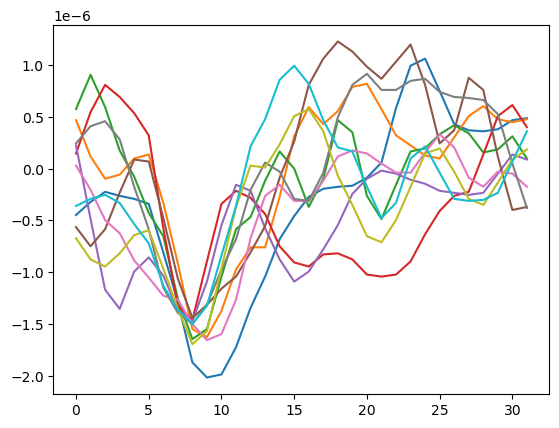

In [ ]:
spikes = pl2_spikes(filename, 2)
for i in range(10):
    plt.plot(np.array(spikes.waveforms[i])) 
plt.show()

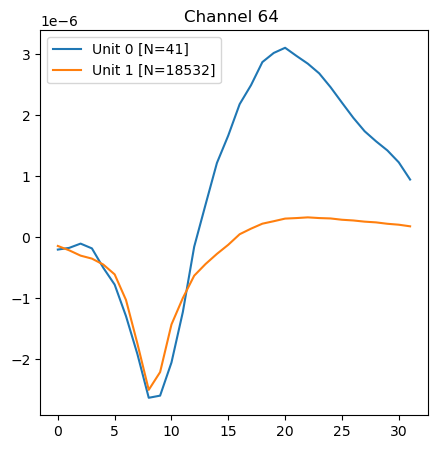

In [52]:
plt.figure(figsize=(5, 5))
channel_id = 64
spikes = pl2_spikes(filename, channel_id - 1) # here it is 0-indexed, so we need to subtract 1
uniq_units = np.unique(spikes.units)
for iunit in range(len(uniq_units)):
    unit_id = uniq_units[iunit] # 0, 1, 2, 3,   0 is unsorted, 1 is unit A
    spk_unit_0 = spikes.units == unit_id
    ts_unit_0 = np.array(spikes.timestamps)[spk_unit_0]
    wave_unit_0 = np.array(spikes.waveforms)[spk_unit_0]
    avg_waveform = np.mean(wave_unit_0, axis=0)
    plt.plot(avg_waveform, label=f'Unit {unit_id} [N={len(ts_unit_0)}]')
plt.title(f'Channel {channel_id} ')
plt.legend()
plt.show()


In [104]:
filename

'S:\\Data-Ephys-Raw\\Alfa-14052021-004.pl2'

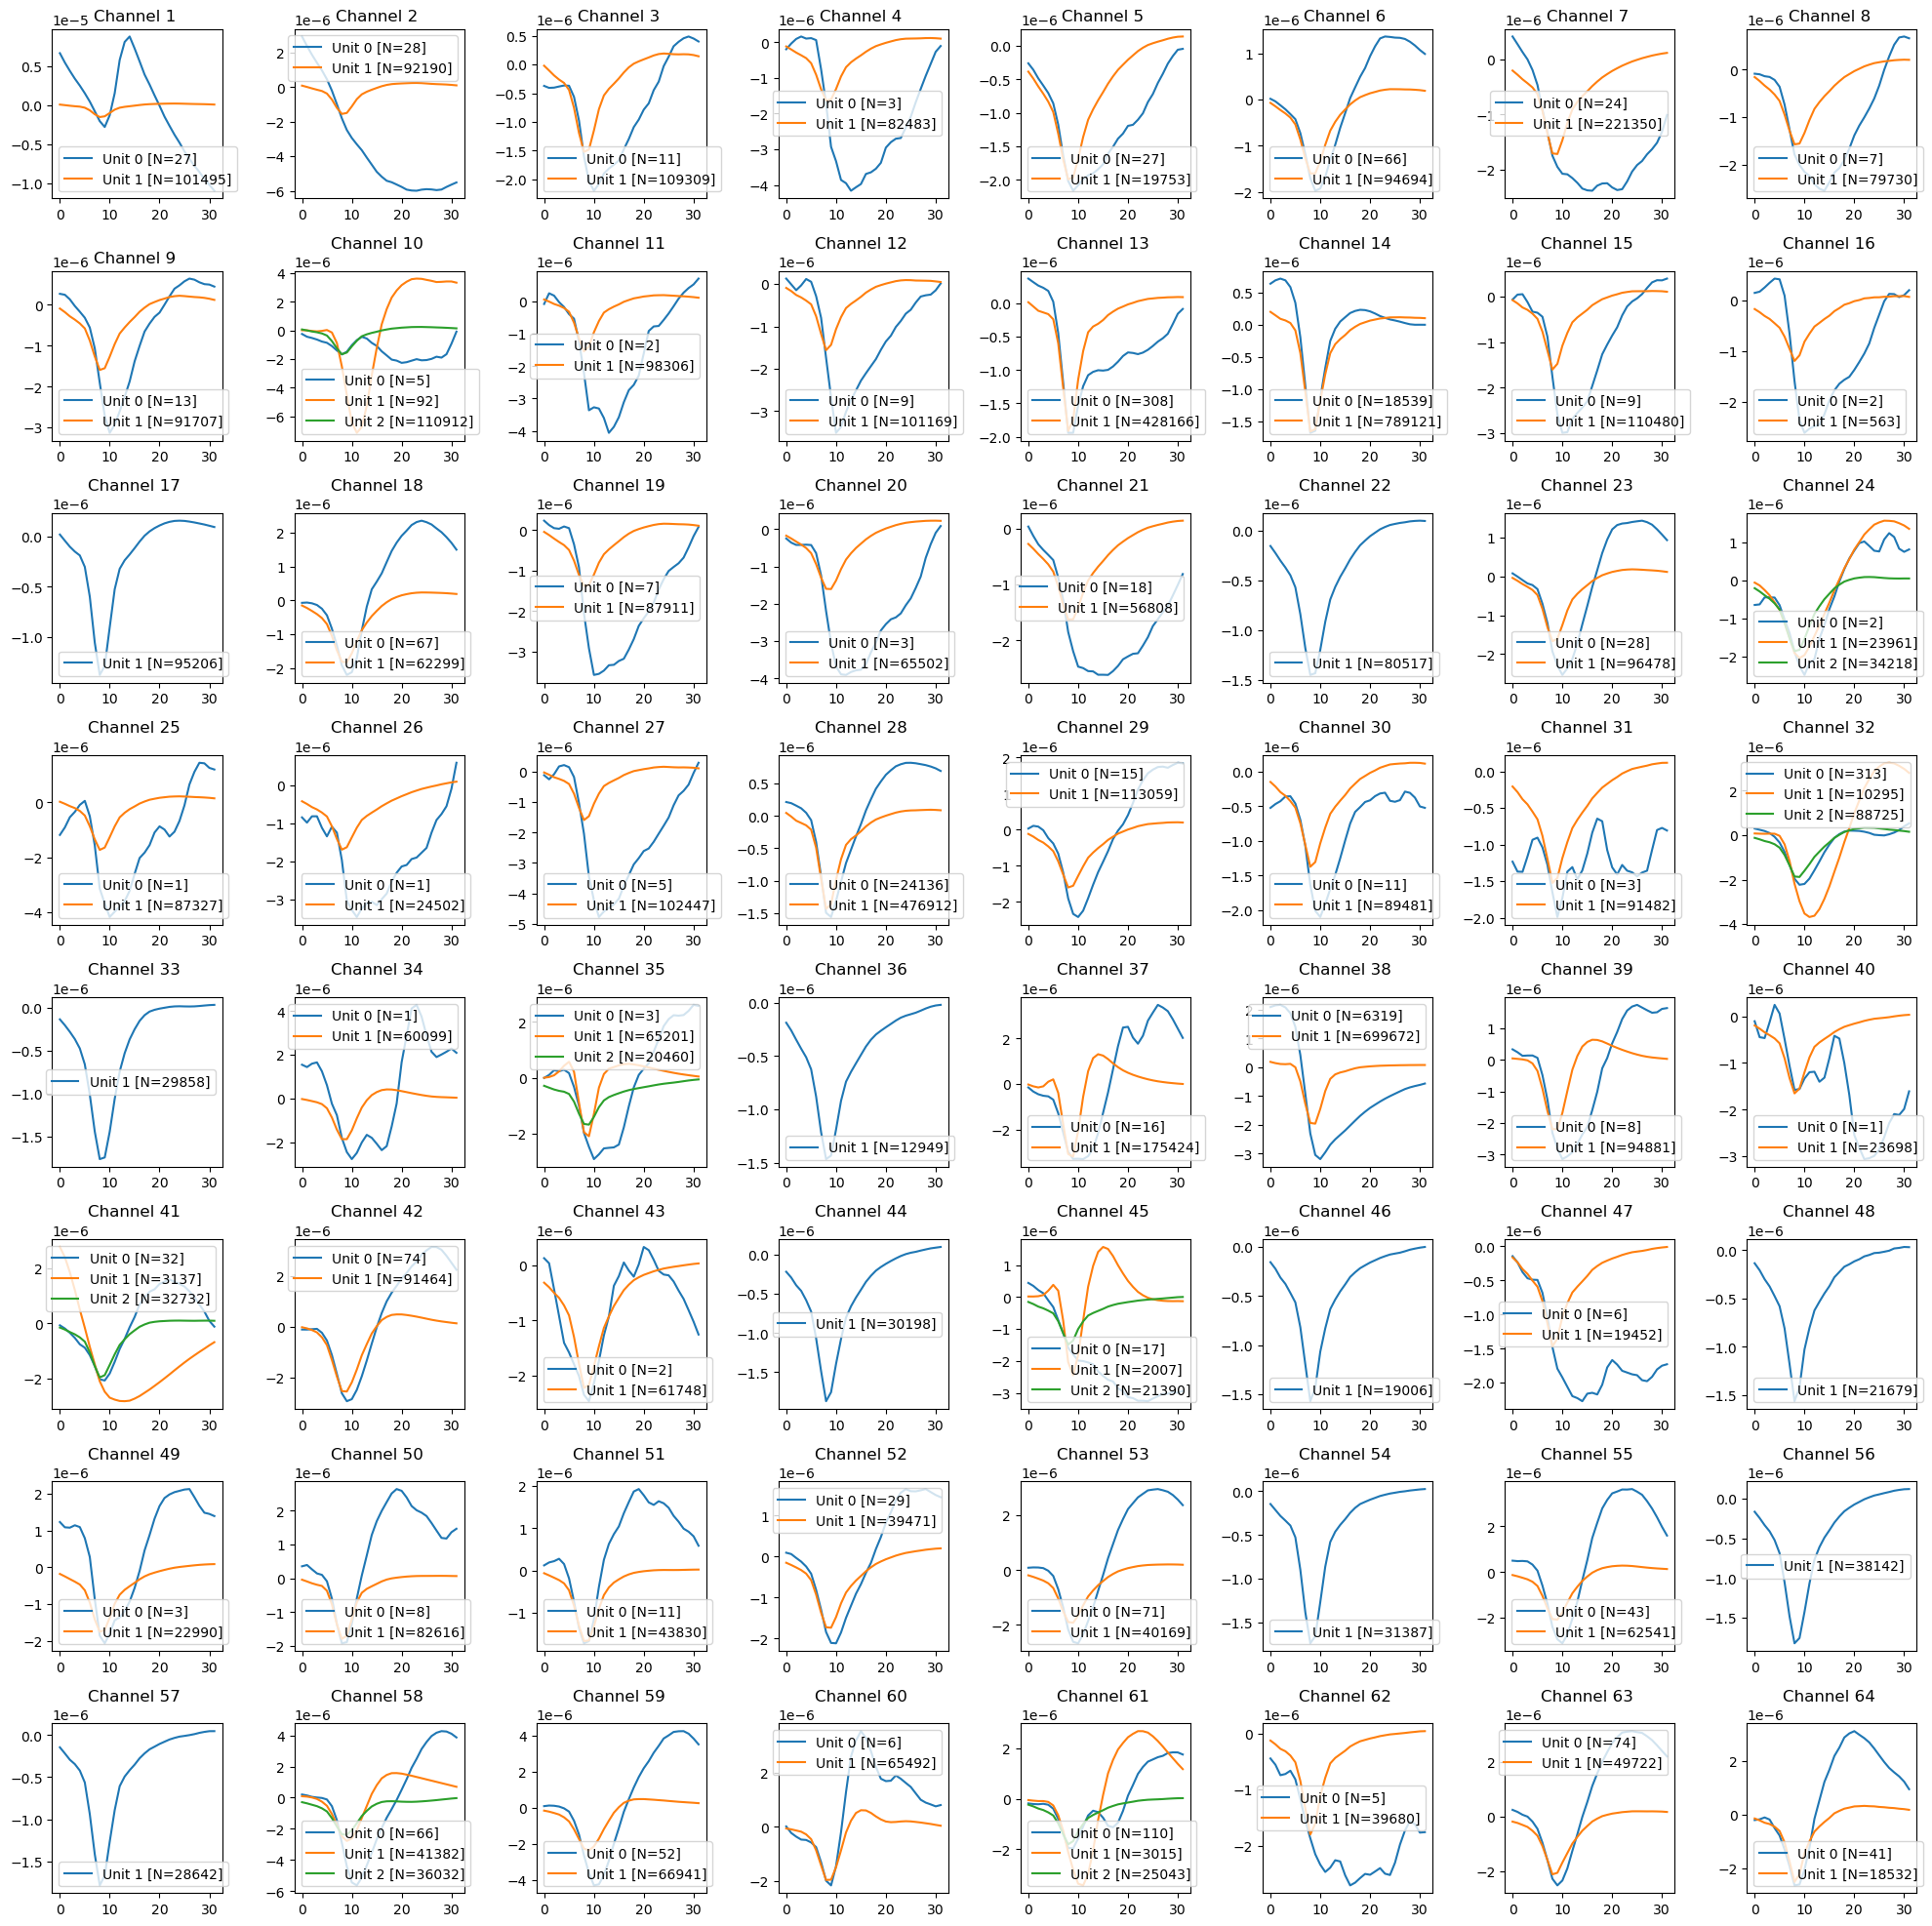

In [103]:
figh, axs = plt.subplots(8, 8, figsize=(20, 20))
axs = axs.flatten()
for channel_id in range(1, 65):
    plt.sca(axs[channel_id - 1])
    spikes = pl2_spikes(filename, channel_id - 1) # here it is 0-indexed, so we need to subtract 1
    uniq_units = np.unique(spikes.units)
    for iunit in range(len(uniq_units)):
        unit_id = uniq_units[iunit] # 0, 1, 2, 3,   0 is unsorted, 1 is unit A
        spk_unit_0 = spikes.units == unit_id
        ts_unit_0 = np.array(spikes.timestamps)[spk_unit_0]
        wave_unit_0 = np.array(spikes.waveforms)[spk_unit_0]
        avg_waveform = np.mean(wave_unit_0, axis=0)
        plt.plot(avg_waveform, label=f'Unit {unit_id} [N={len(ts_unit_0)}]')
    plt.title(f'Channel {channel_id} ')
    plt.legend()
plt.tight_layout()
plt.show()

In [56]:
for channel_id in range(1, 65):
    spikes = pl2_spikes(filename, channel_id - 1) # Note most time is spent on this line 68 sec for 64 channels. Even loading from local folder. So pretty heavy. 

In [55]:
for channel_id in range(1, 65):
    spikes = pl2_spikes(filename, channel_id - 1) # here it is 0-indexed, so we need to subtract 1
    uniq_units = np.unique(spikes.units)
    for iunit in range(len(uniq_units)):
        unit_id = uniq_units[iunit] # 0, 1, 2, 3,   0 is unsorted, 1 is unit A
        spk_unit_0 = spikes.units == unit_id
        ts_unit_0 = np.array(spikes.timestamps)[spk_unit_0]
        # wave_unit_0 = np.array(spikes.waveforms)[spk_unit_0]
        # avg_waveform = np.mean(wave_unit_0, axis=0)

In [25]:
len(spikes.timestamps)

101522

### Compress the spikes data into a dictionary with channel_id as the key

In [101]:
from tqdm import tqdm, trange

In [102]:
spike_data = {}
for channel_id in trange(1, 65):
    spikes = pl2_spikes(filename, channel_id - 1) # note this is 0-indexed
    # This is a namedtuple, so we can drop the waveforms and keep the other fields
    spikes = spikes._asdict()
    spikes.pop('waveforms')
    spikes['channel'] = channel_id
    spike_data[channel_id] = spikes

pkl.dump(spike_data, open(os.path.join(PKL_root, ephysFN.replace('.pl2', '_raw_spikes.pkl')), "wb")) # 7Gb => 64mb, huge reduction. 

100%|██████████| 64/64 [01:08<00:00,  1.08s/it]


In [97]:
type(spike_data[1])

pypl2.pypl2api.PL2Spikes

In [98]:
spike_data[1]._asdict()

{'n': 101522,
 'timestamps': (0.005,
  0.00905,
  0.01635,
  0.021125,
  0.0236,
  0.0449,
  0.07265,
  0.07495,
  0.0792,
  0.0835,
  0.10065,
  0.11665,
  0.118825,
  0.14645,
  0.159325,
  0.1763,
  0.207925,
  0.247475,
  0.250925,
  0.2646,
  0.285525,
  0.313,
  0.3298,
  0.3323,
  0.339725,
  0.4148,
  0.42485,
  0.4257,
  0.426375,
  0.43315,
  0.4342,
  0.4419,
  0.448475,
  0.4493,
  0.451575,
  0.4548,
  0.46915,
  0.486375,
  0.490225,
  0.503725,
  0.51605,
  0.530125,
  0.558825,
  0.566425,
  0.58245,
  0.5997,
  0.629075,
  0.6656,
  0.670375,
  0.685025,
  0.6978,
  0.705675,
  0.738225,
  0.7862,
  0.790125,
  0.83115,
  0.844175,
  0.849075,
  0.85195,
  0.8555,
  0.858775,
  0.8594,
  0.86705,
  0.8836,
  0.8909,
  0.89915,
  0.93145,
  0.95535,
  0.957475,
  1.041475,
  1.05505,
  1.0706,
  1.105525,
  1.107475,
  1.10905,
  1.12725,
  1.138375,
  1.180125,
  1.1861,
  1.187775,
  1.265325,
  1.283075,
  1.302725,
  1.34685,
  1.3587,
  1.38185,
  1.3841,
  1.39847

In [91]:
print(spikes.timestamps)

(0.005, 0.00905, 0.01635, 0.021125, 0.0236, 0.0449, 0.07265, 0.07495, 0.0792, 0.0835, 0.10065, 0.11665, 0.118825, 0.14645, 0.159325, 0.1763, 0.207925, 0.247475, 0.250925, 0.2646, 0.285525, 0.313, 0.3298, 0.3323, 0.339725, 0.4148, 0.42485, 0.4257, 0.426375, 0.43315, 0.4342, 0.4419, 0.448475, 0.4493, 0.451575, 0.4548, 0.46915, 0.486375, 0.490225, 0.503725, 0.51605, 0.530125, 0.558825, 0.566425, 0.58245, 0.5997, 0.629075, 0.6656, 0.670375, 0.685025, 0.6978, 0.705675, 0.738225, 0.7862, 0.790125, 0.83115, 0.844175, 0.849075, 0.85195, 0.8555, 0.858775, 0.8594, 0.86705, 0.8836, 0.8909, 0.89915, 0.93145, 0.95535, 0.957475, 1.041475, 1.05505, 1.0706, 1.105525, 1.107475, 1.10905, 1.12725, 1.138375, 1.180125, 1.1861, 1.187775, 1.265325, 1.283075, 1.302725, 1.34685, 1.3587, 1.38185, 1.3841, 1.398475, 1.409475, 1.420675, 1.430225, 1.466875, 1.4972, 1.529275, 1.5661, 1.578625, 1.584075, 1.59575, 1.631425, 1.6479, 1.661875, 1.671, 1.68245, 1.69395, 1.70015, 1.737025, 1.746075, 1.7535, 1.7652, 1.76827